In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('data gadget.csv')
data.head()

,Timestamp,Gender,Your study year,Which department,How many electronic devices do you use?,What is your recent latest CGPA ?,Is there an increase in your CGPA?,Average hour you spent using electronic devices for academic purposes in a day (hours).,What is the purpose of buying the device?
0,7/19/2022 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,7/21/2022 2:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,7/21/2022 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,8/22/2022 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,8/22/2022 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


In [3]:
data.shape

(30, 9)

## change name of columns

In [4]:
data.columns = ["time", "gender","year_study","department",
                "num_gadget", "recent_grade","GPA","hour", "purpose"]

In [5]:
data.describe()

,num_gadget
count,30.000000
mean,2.566667
std,0.817200
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          30 non-null     object
 1   gender        30 non-null     object
 2   year_study    30 non-null     object
 3   department    30 non-null     object
 4   num_gadget    30 non-null     int64 
 5   recent_grade  30 non-null     object
 6   GPA           30 non-null     object
 7   hour          30 non-null     object
 8   purpose       30 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.2+ KB


## split values in column hour 

In [7]:
data["daily_hours"] = (data["hour"].str.split("-",expand=True)[0].astype(int)+ data["hour"].
                       str.split("-",expand=True)[1].astype(int))/2

## average hours spent in front of gadgets

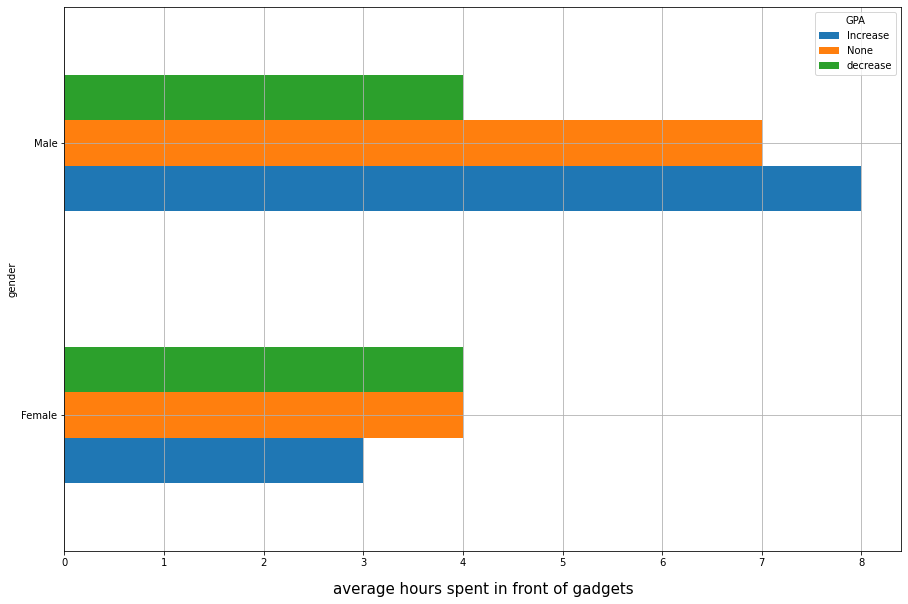

In [8]:
pd.pivot_table(data, index = 'gender', columns= "GPA", values= "daily_hours", aggfunc='count').plot(kind="barh", figsize =(15, 10))
plt.xlabel("average hours spent in front of gadgets", fontsize =15, labelpad= 14)
plt.grid()

according to the visualization above, we get an insight that the use of gadgets based on GPA parameters increases among male up to 8 hours per day compared to Female which is only 3 hours per day.

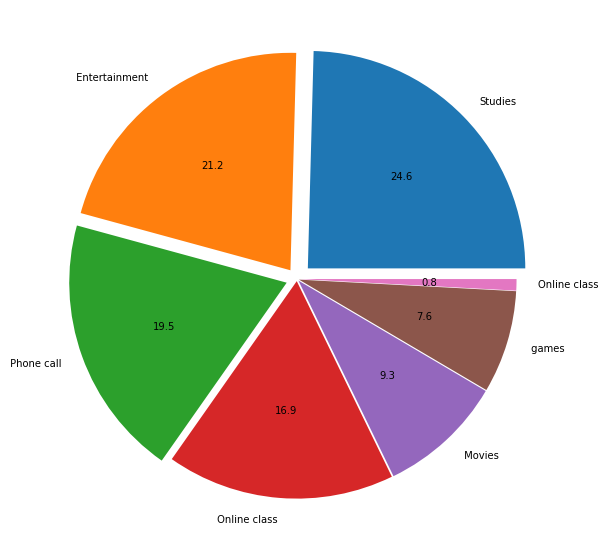

In [9]:
freq = data['purpose'].str.split(',', expand = True).stack().value_counts()
plt.figure(figsize = (10,10))
plt.pie(freq, autopct='%.1f', explode = (0.07,0.05,0.05,0.01,0.01,0.01,0.01), labels = freq.index);

based on the pie chart that has been made, it is found that most of the use of gadgets is used for purposes for studies which get more than 24%, 21% for entertainment, 19% for phone calls and the rest is used for online classes, movies and games.

In [10]:
data["purpose"].value_counts()

Studies, Entertainment, Online class, games, Movies, Phone call    7
Studies, Entertainment, Online class, Phone call                   7
Studies, Entertainment                                             5
Studies, Entertainment, Phone call                                 3
Studies, Entertainment, Online class                               2
Studies, Online class, Phone call                                  2
Studies, Online class, games, Movies, Phone call                   1
Studies, Entertainment, games, Movies, Phone call                  1
Studies, Online class, Movies, Phone call                          1
Online class, Movies, Phone call                                   1
Name: purpose, dtype: int64

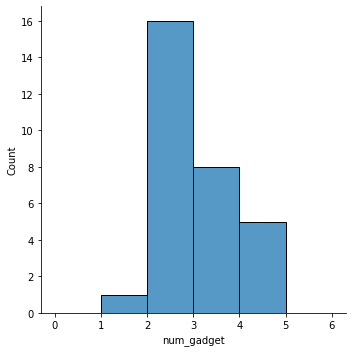

In [11]:
sns.displot(data = data, x = "num_gadget", bins = [0, 1, 2, 3, 4,5,6])

The factor of using gadgets is not only the duration when using them, but also how many people have these gadgets. According to the data in the histogram above, most people have 2 gadgets at once.

Text(0, 0.5, 'daily hours spent in front of gadgets')

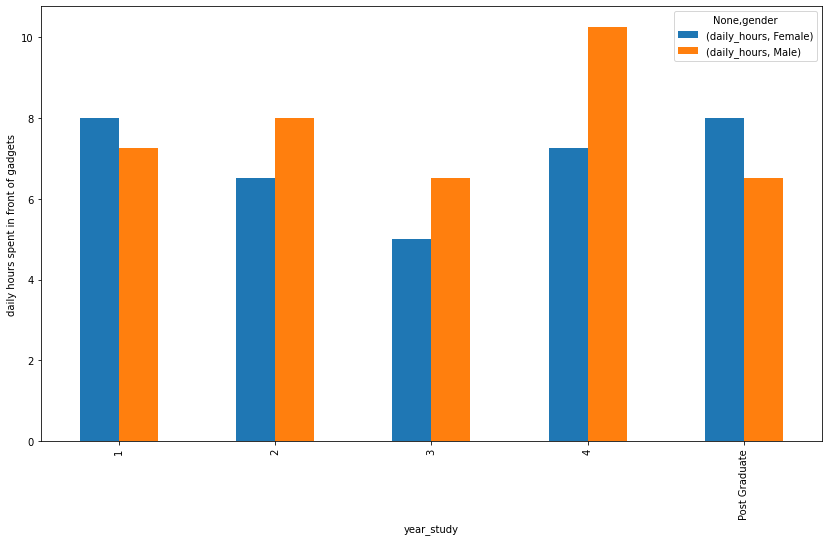

In [12]:
pd.pivot_table(data, index = "year_study", columns= "gender", values = ["daily_hours"]).plot(kind = "bar", figsize= (14, 8))
plt.ylabel("daily hours spent in front of gadgets")

Based on the data above, it is found that men who are in year 4 at college spend more time in front of gadgets than women in year 4 who only spend time in front of gadgets less than 8 hours per day

In [13]:
data[["department", "num_gadget"]].groupby("department").mean().sort_values("num_gadget", ascending = False)

,num_gadget
department,
Business Management,3.000000
Creative Industries,3.000000
Information Technology,2.600000
Allied Health Sciences,2.500000
Engineering,2.500000
Hospitality & Tourism,2.333333
Architecture & Built Environment,2.000000
Education & Liberal Studies,2.000000


Business management and creative industries majors are majors that spend an average of their time in front of gadgets

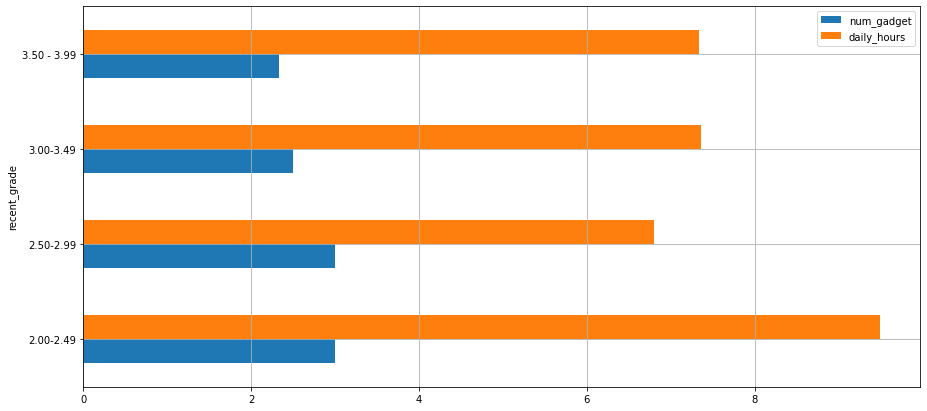

In [14]:
data.groupby("recent_grade").mean().plot(kind = "barh", figsize= (15, 7))
plt.grid()

someone who has a GPA below 2.50 - 2.99 has a track record of interacting with gadgets more than someone who has a GPA above 2.50.
The conclusions that can be drawn from the above analysis are
- the use of gadgets must be adjusted according to their respective needs and capacities
- the use of gadgets does have positive and negative impacts depending on who is holding the gadget.
- don't get carried away with gadgets that can make us even more lazy - on the contrary, with gadgets that are already around us, we must be more able to control ourselves in using gadgets so that they don't become boomerangs in the future.